In [1]:
import sys
sys.path.append("../")  # look one directory up for qca modules, TODO: make a package
from copy import copy
from qca import QCA
from states import make_state
from mpl_toolkits import mplot3d
from matplotlib import cm
from scipy.optimize import curve_fit
from os import makedirs
import matplotlib.pyplot as plt
import measures as ms
import numpy as np
%matplotlib inline
der=r"/home/lhillber/documents/research/cellular_automata/qeca/qca/data/"

In [2]:
import qca
import core
import matrix
from importlib import reload
reload(qca)
reload(core)
reload(matrix)
from qca import QCA

In [3]:
params_template = dict(
              L=15,
              T=100.0,
              dt=1.0,
              R=6,
              r=1,
              V="H",
              BC="1-00",
              IC="c1_f0",
              E=0.0,
              N=1,
              totalistic=False,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

params = copy(params_template) 

Q = QCA(params, der=der)
    
Q.run(tasks=["rhoj", "rhojk"], verbose=False)

Running
{'L': 15, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'H', 'IC': 'c1_f0', 'BC': '1-00', 'E': 0.0, 'N': 1, 'trotter': True, 'symmetric': False, 'totalistic': False, 'hamiltonian': False}
Running
{'L': 15, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'H', 'IC': 'c1_f0', 'BC': '1-00', 'E': 0.0, 'N': 1, 'trotter': True, 'symmetric': False, 'totalistic': False, 'hamiltonian': False}


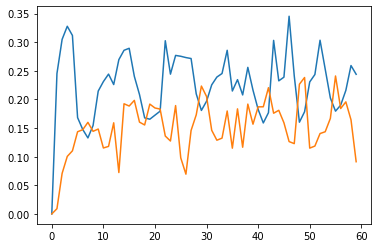

In [4]:
plt.plot(Q.Y(1)[:60])
plt.plot(Q.C(1)[:60])

In [5]:
import qca
import core
import matrix
from importlib import reload
reload(qca)
reload(core)
reload(matrix)
from qca import QCA

from states import make_state
from matrix import rdm, ptranspose


In [6]:
from matrix import listkron
from core1d import rule_hamiltonian
from numpy.linalg import eigh
from scipy.linalg import expm
from measures import get_expectation, get_rhoj, expectation
from matrix import ops


H = rule_hamiltonian(V="X", R=5, L=6, r=1, BC="0")
initstate = make_state(6, "f2")
vals, vecs  = eigh(H)


In [7]:
L=8
H = rule_hamiltonian(V="X", R=14, L=L, r=1, BC="0")
initstate = make_state(L, "r1")
vals, vecs  = eigh(H)

initstate_eng = np.dot(np.conj(vecs).T, initstate)
A = matrix.op_at("Z", 0, L)
Aeng = (vecs.T).dot(A).dot(vecs)

diag = sum(np.abs(C)**2 * Aeng[a,a] for a, C in enumerate(initstate_eng)).real


E0 = expectation(initstate, H)
Emx = np.max(np.abs(vals-E0))
Emn = np.min(np.abs(vals-E0))
dEs = np.linspace(1e-2+Emn,Emx,20)
microcanons = [np.mean([Aeng[a,a]
                        for a, Ea in enumerate(vals) 
                            if np.abs(Ea-E0)<=dE]).real 
               for dE in dEs]

canonicals = []
for kT in dEs:
    ebH = expm(-H/kT)
    part = np.trace(ebH)
    thstate = ebH / part
    canonicals.append(expectation(thstate, A))




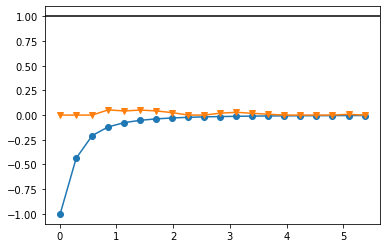

In [9]:
plt.plot(dEs, canonicals, marker="o")
plt.plot(dEs, microcanons, marker="v")
plt.axhline(diag, c="k")

In [ ]:
L=8
R=1
H = rule_hamiltonian(V="X", R=R, L=L, r=1, BC="0")